In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
name1880 = ['name', 'gender', 'birth']
names1880 = pd.read_csv('yob1880.txt', sep = ',', engine = 'python', names = name1880)
names1880

,name,gender,birth
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [2]:
names1880.groupby('gender').birth.sum()

gender
F     90993
M    110493
Name: birth, dtype: int64

In [3]:
cols = [ 'name' , 'gender', 'birth']
years = range(1880, 2011)
pieces = []
for i in years:
    df = pd.read_table('yob%d.txt'%i, sep = ',', engine = 'python' , names = cols)
    df['year'] = i
    pieces.append(df)
    data = pd.concat(pieces, ignore_index = True)
data

,name,gender,birth,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


In [4]:
sum_years = data.pivot_table('birth', 'year', 'gender', aggfunc='sum')
sum_years

gender,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445
...,...,...
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310


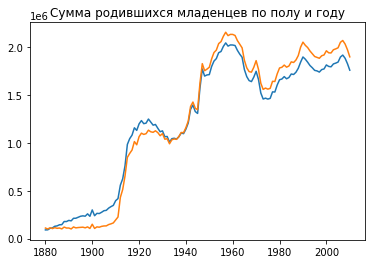

In [5]:
plt.title('Сумма родившихся младенцев по полу и году')
plt.plot(sum_years)

In [6]:
def add_proportion(proportion):
    birth = proportion.birth.astype(float)
    proportion['proportion'] = birth/birth.sum()
    return proportion
names = data.groupby(['year', 'gender']).apply(add_proportion)
names

,name,gender,birth,year,proportion
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


In [7]:
names_index = names.set_index(['gender','name','year']).sort_index()
names_index

birth  proportion
gender name      year                   
F      Aabriella 2008      5    0.000003
       Aaden     2009      5    0.000003
       Aadhya    2007     10    0.000005
                 2008      9    0.000005
                 2009     18    0.000010
...                      ...         ...
M      Zytavious 2007      6    0.000003
                 2009      7    0.000004
                 2010      6    0.000003
       Zyvion    2009      5    0.000003
       Zzyzx     2010      5    0.000003

[1690784 rows x 2 columns]

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


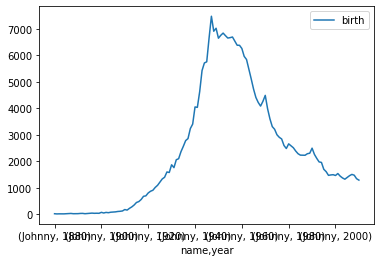

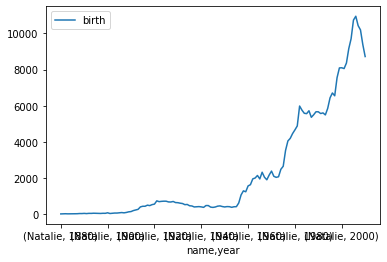

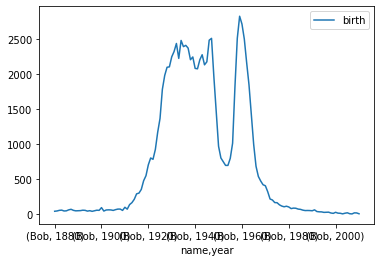

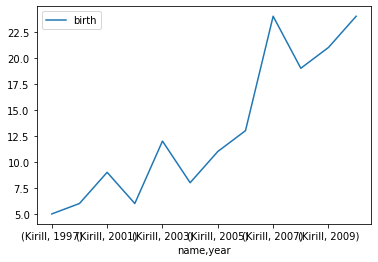

In [8]:
graph = pd.pivot_table(data, index = ['name','year'], values = ['birth'], aggfunc = 'sum')
print(graph['Johnny':'Johnny'].plot(y = 'birth', use_index = True))
print(graph['Natalie':'Natalie'].plot(y = 'birth', use_index = True))
print(graph['Bob':'Bob'].plot(y = 'birth', use_index = True))
print(graph['Kirill':'Kirill'].plot(y = 'birth', use_index = True))

In [9]:
pieces = []
for i in years:
    df = pd.read_table('yob%d.txt'%i, sep = ',', engine = 'python' , names = cols)
    df['year'] = i
    df.sort_values(by = 'birth', ascending = False)
    df = df.head(1)
    pieces.append(df)
    data = pd.concat(pieces, ignore_index = True)
data

,name,gender,birth,year
0,Mary,F,7065,1880
1,Mary,F,6919,1881
2,Mary,F,8149,1882
3,Mary,F,8012,1883
4,Mary,F,9217,1884
...,...,...,...,...
126,Emily,F,21365,2006
127,Emily,F,19322,2007
128,Emma,F,18765,2008
129,Isabella,F,22222,2009
